In [1]:
# Import Required Modules
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import load_model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function to extract features from audio file
def getFeaturesTest(filename):

    # Reading File
    y,sr=librosa.load(filename)

    # Mel Frequency Cepstral Coefficients
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    # Short Term Fourier Transform
    stft = np.abs(librosa.stft(y))

    # Chromagram from STFT
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)

    # Spectral Contrasts
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)

    # Tonal Centroid Features
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y),sr=sr).T,axis=0)

    # Flatten the array
    features = np.concatenate((mfcc, chroma, mel, contrast, tonnetz), axis=0)
    return np.array([features])

In [3]:
# Import Dataset
data = pd.read_csv('AudioFeaturesDataset6classes.csv')

# Input Features
x = np.array(data.drop(['Class'], axis=1))

# Label (Output Feature)
y = []
for i in range(data.shape[0]):
	if data.iloc[i, -1] == 'Axecutting_Sounds':
		y.append([1, 0, 0, 0, 0, 0])
	elif data.iloc[i, -1] == 'Chainsaw_Sounds':
		y.append([0, 1, 0, 0, 0, 0])
	elif data.iloc[i, -1] == 'Forest_Sounds':
		y.append([0, 0, 1, 0, 0, 0])
	elif data.iloc[i, -1] == 'Handsaw_Sounds':
		y.append([0, 0, 0, 1, 0, 0])
	elif data.iloc[i, -1] == 'Rain&Thunder_Sounds':
		y.append([0, 0, 0, 0, 1, 0])
	elif data.iloc[i, -1] == 'Wind_Sounds':
		y.append([0, 0, 0, 0, 0, 1])

# Randomize Data
x,y = shuffle(x, np.array(y))

In [4]:
# Splitting data for Training, Testing and Validation
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=101)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.15, random_state=101)

In [5]:
modelNamesBest = list(filter(lambda x : x.endswith('Best_Model.hdf5'), os.listdir()))
print(modelNamesBest)

['BICRNN_Best_Model.hdf5', 'CNN_Best_Model.hdf5', 'CRNN_Best_Model.hdf5', 'RESNET_Best_Model.hdf5']


Training Data Metrics for BICRNN_Best_Model.hdf5
163/163 [==============================] - 3s 7ms/step - loss: 0.0759 - accuracy: 0.9700
Training Data Accuracy : 0.9700115323066711
Training Data Loss : 0.07588669657707214
163/163 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       869
           1       0.97      0.98      0.97       855
           2       1.00      1.00      1.00       862
           3       1.00      1.00      1.00       873
           4       0.96      0.92      0.94       878
           5       0.91      0.97      0.94       865

    accuracy                           0.97      5202
   macro avg       0.97      0.97      0.97      5202
weighted avg       0.97      0.97      0.97      5202



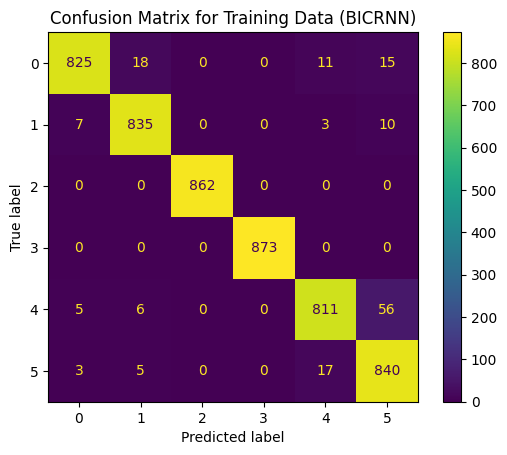

Validation Data Metrics for BICRNN_Best_Model.hdf5
29/29 [==============================] - 0s 12ms/step - loss: 0.0617 - accuracy: 0.9804
Validation Data Accuracy : 98.03921580314636
Validation Data Loss : 0.06169544905424118
29/29 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       151
           1       0.99      0.97      0.98       153
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       152
           4       0.99      0.94      0.96       150
           5       0.94      0.99      0.97       153

    accuracy                           0.98       918
   macro avg       0.98      0.98      0.98       918
weighted avg       0.98      0.98      0.98       918



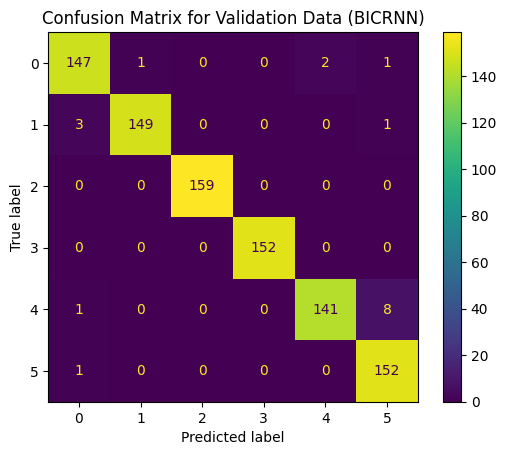

Training Data Metrics for CNN_Best_Model.hdf5
163/163 [==============================] - 1s 3ms/step - loss: 0.0965 - accuracy: 0.9619
Training Data Accuracy : 0.9619377255439758
Training Data Loss : 0.09651355445384979
163/163 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       869
           1       0.96      0.97      0.96       855
           2       1.00      1.00      1.00       862
           3       1.00      1.00      1.00       873
           4       0.95      0.91      0.93       878
           5       0.92      0.94      0.93       865

    accuracy                           0.96      5202
   macro avg       0.96      0.96      0.96      5202
weighted avg       0.96      0.96      0.96      5202



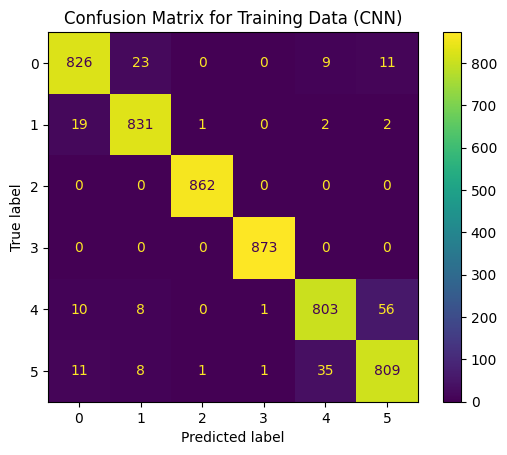

Validation Data Metrics for CNN_Best_Model.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 0.0851 - accuracy: 0.9706
Validation Data Accuracy : 97.0588207244873
Validation Data Loss : 0.08512210100889206
29/29 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       151
           1       0.95      0.98      0.96       153
           2       1.00      1.00      1.00       159
           3       0.99      1.00      1.00       152
           4       0.97      0.93      0.95       150
           5       0.95      0.96      0.95       153

    accuracy                           0.97       918
   macro avg       0.97      0.97      0.97       918
weighted avg       0.97      0.97      0.97       918



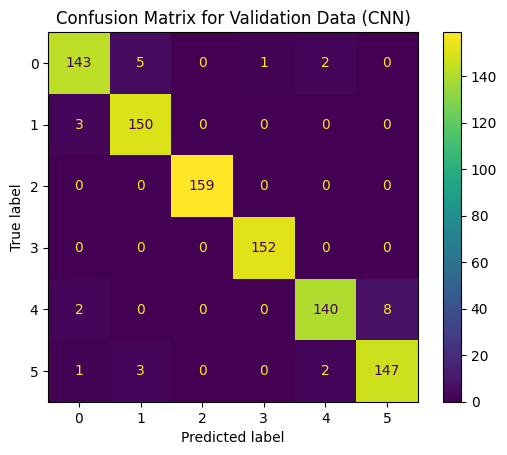

Training Data Metrics for CRNN_Best_Model.hdf5
163/163 [==============================] - 1s 4ms/step - loss: 0.1554 - accuracy: 0.9456
Training Data Accuracy : 0.9455978274345398
Training Data Loss : 0.15542195737361908
163/163 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       869
           1       0.97      0.96      0.96       855
           2       0.95      1.00      0.97       862
           3       0.97      1.00      0.98       873
           4       0.94      0.92      0.93       878
           5       0.92      0.87      0.90       865

    accuracy                           0.95      5202
   macro avg       0.95      0.95      0.95      5202
weighted avg       0.95      0.95      0.95      5202



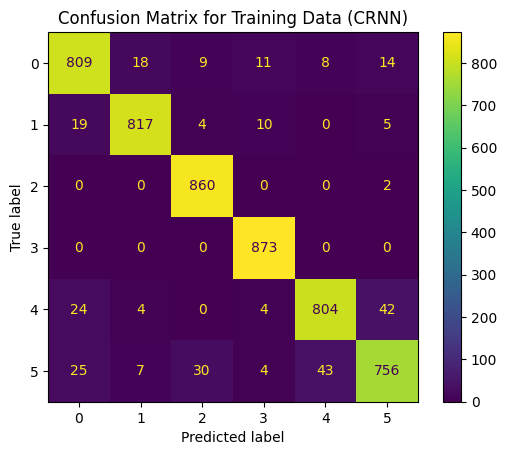

Validation Data Metrics for CRNN_Best_Model.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.9488
Validation Data Accuracy : 94.88017559051514
Validation Data Loss : 0.1541270762681961
29/29 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       151
           1       0.96      0.95      0.96       153
           2       0.96      1.00      0.98       159
           3       0.96      1.00      0.98       152
           4       0.95      0.92      0.94       150
           5       0.94      0.89      0.91       153

    accuracy                           0.95       918
   macro avg       0.95      0.95      0.95       918
weighted avg       0.95      0.95      0.95       918



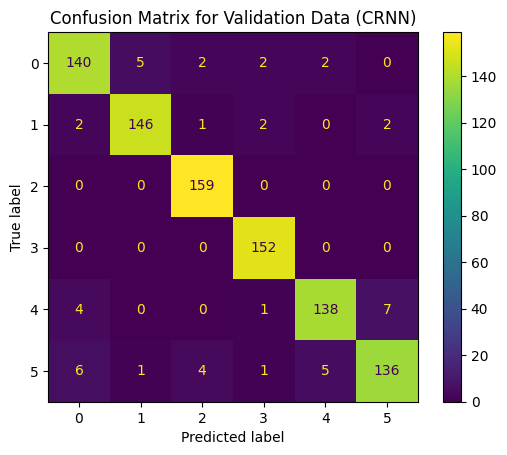

Training Data Metrics for RESNET_Best_Model.hdf5
163/163 [==============================] - 2s 8ms/step - loss: 0.1094 - accuracy: 0.9587
Training Data Accuracy : 0.9586697220802307
Training Data Loss : 0.10941268503665924
163/163 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       869
           1       0.98      0.96      0.97       855
           2       1.00      0.99      1.00       862
           3       0.99      1.00      1.00       873
           4       0.91      0.95      0.93       878
           5       0.99      0.87      0.92       865

    accuracy                           0.96      5202
   macro avg       0.96      0.96      0.96      5202
weighted avg       0.96      0.96      0.96      5202



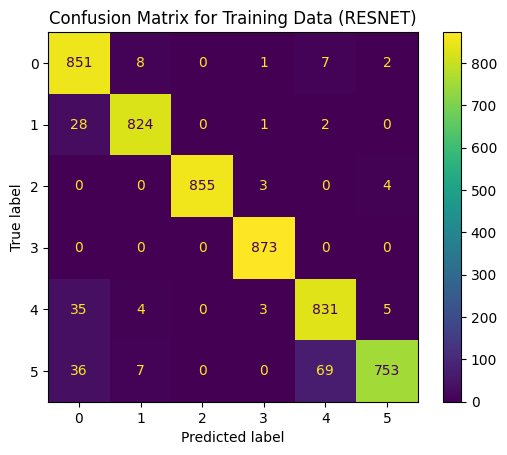

Validation Data Metrics for RESNET_Best_Model.hdf5
29/29 [==============================] - 1s 20ms/step - loss: 0.1082 - accuracy: 0.9630
Validation Data Accuracy : 96.29629850387573
Validation Data Loss : 0.10824617743492126
29/29 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       151
           1       0.99      0.96      0.97       153
           2       1.00      1.00      1.00       159
           3       0.99      1.00      1.00       152
           4       0.93      0.97      0.95       150
           5       0.99      0.85      0.92       153

    accuracy                           0.96       918
   macro avg       0.96      0.96      0.96       918
weighted avg       0.97      0.96      0.96       918



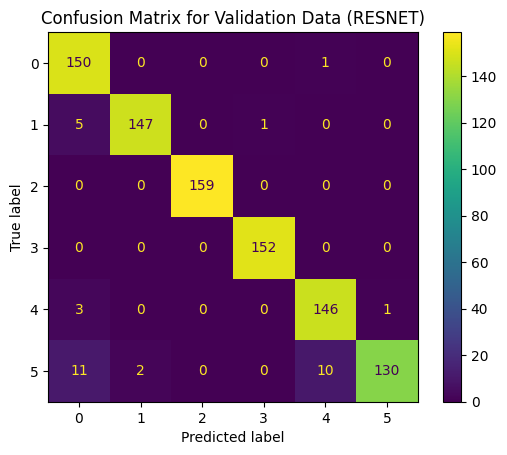

In [6]:
accTraining = []
accValidation = []
lossTraining = []
lossValidation = []
yTrueTrains = []
yPredTrains = []
yTrueVals = []
yPredVals = []

for modelName in modelNamesBest:
    model = load_model(modelName)

    print(f'Training Data Metrics for {modelName}')
    loss, acc = model.evaluate(xtrain, ytrain, batch_size=32)
    print("Training Data Accuracy :", acc)
    print("Training Data Loss :", loss)
    accTraining.append(acc*100)
    lossTraining.append(loss)
    yPredTrain = np.argmax(model.predict(xtrain), axis=1)
    yTrueTrain = np.argmax(ytrain, axis=1)
    yPredTrains.append(yPredTrain)
    yTrueTrains.append(yTrueTrain)
    creport = classification_report(yTrueTrain,yPredTrain)
    print(creport)
    cm = confusion_matrix(yTrueTrain, yPredTrain)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for Training Data ({modelName.split("_")[0]})')
    plt.show()

    print(f'Validation Data Metrics for {modelName}')
    loss, acc = model.evaluate(xval, yval, batch_size=32)
    print("Validation Data Accuracy :", acc*100)
    print("Validation Data Loss :", loss)
    accValidation.append(acc)
    lossValidation.append(loss)
    yPredVal = np.argmax(model.predict(xval), axis=1)
    yTrueVal = np.argmax(yval, axis=1)
    yPredVals.append(yPredVal)
    yTrueVals.append(yTrueVal)
    creport = classification_report(yTrueVal,yPredVal)
    print(creport)
    cm = confusion_matrix(yTrueVal, yPredVal)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for Validation Data ({modelName.split("_")[0]})')
    plt.show()

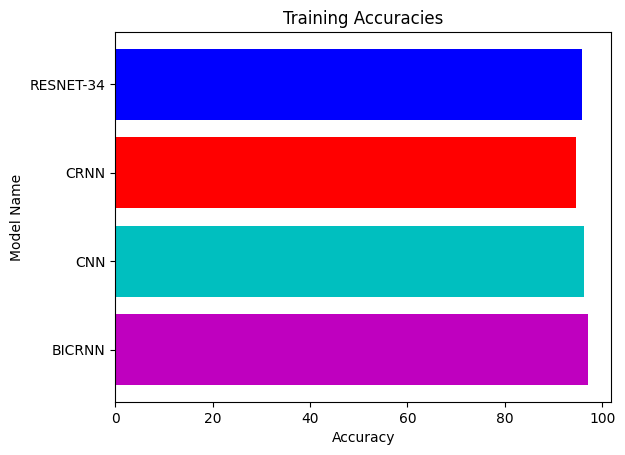

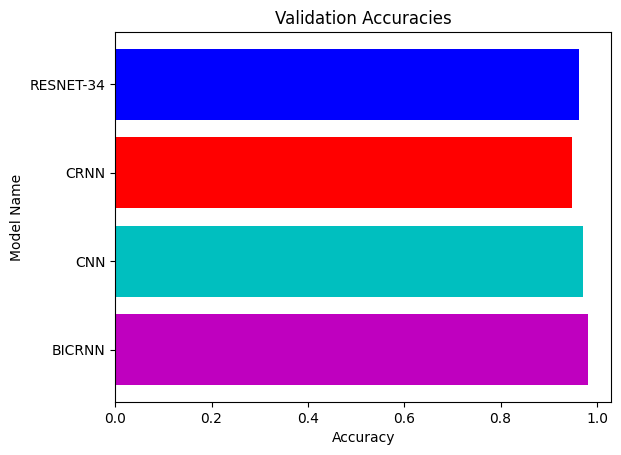

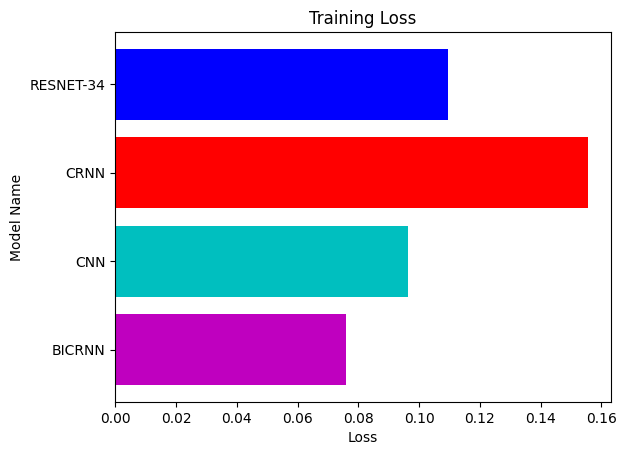

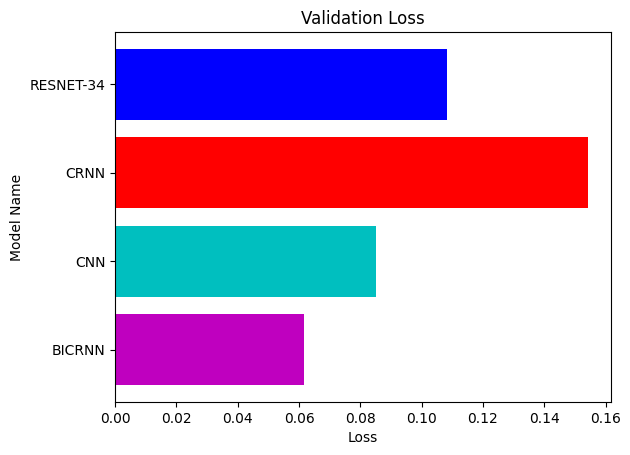

In [7]:
models = ('BICRNN', 'CNN', 'CRNN', 'RESNET-34')
colors = ('m', 'c', 'r', 'b')

plt.barh(models, accTraining, color=colors)
plt.ylabel("Model Name")
plt.xlabel("Accuracy")
plt.title("Training Accuracies")
plt.show()

plt.barh(models, accValidation, color=colors)
plt.ylabel("Model Name")
plt.xlabel("Accuracy")
plt.title("Validation Accuracies")
plt.show()

plt.barh(models, lossTraining, color=colors)
plt.ylabel("Model Name")
plt.xlabel("Loss")
plt.title("Training Loss")
plt.show()

plt.barh(models, lossValidation, color=colors)
plt.ylabel("Model Name")
plt.xlabel("Loss")
plt.title("Validation Loss")
plt.show()

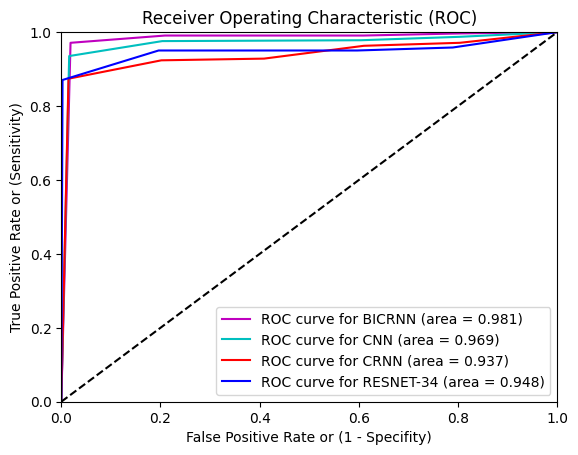

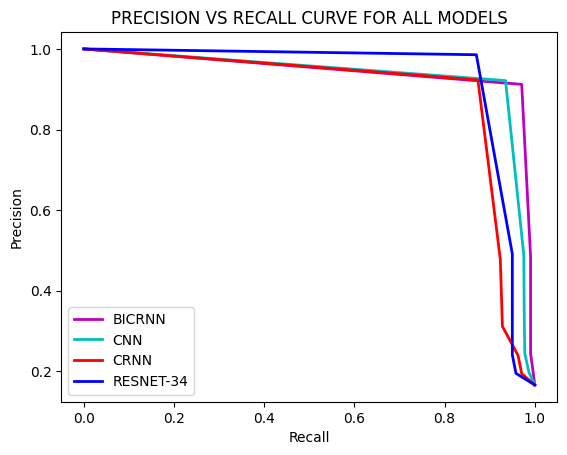

In [8]:
models = ('BICRNN', 'CNN', 'CRNN', 'RESNET-34')
colors = ('m', 'c', 'r', 'b')

for i in range(len(yTrueTrains)):
    fpr, tpr, thresholds = roc_curve(yTrueTrains[i], yPredTrains[i], pos_label=5)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve for %s (area = %0.3f)' % (models[i], roc_auc), color=colors[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import precision_recall_curve
precision = dict()
recall = dict()
for i in range(len(yTrueTrains)):
    precision[i], recall[i], _ = precision_recall_curve(yTrueTrains[i], yPredTrains[i], pos_label=5)
    plt.plot(recall[i], precision[i], lw=2, label='%s'%(models[i]), color=colors[i])
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("PRECISION VS RECALL CURVE FOR ALL MODELS")
plt.show()
